In [ ]:
# Importing Libraries
from zipfile import ZipFile
Dataset='/content/drive/MyDrive/Colab/movie.zip'

# Extracting Dataset
with ZipFile(Dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Importing Required Dependencies
import numpy as np
import pandas as pd

In [ ]:
# Reading into a variable
moviesData = pd.read_csv("/content/movie/Indian_movie_Database_1990_2019.csv",encoding='ISO-8859-1')
print("dataset successfully loaded")

dataset successfully loaded


In [ ]:
# Printing the columns
print(moviesData.head())

   movie_id  Rating  gross_income_doller      budget   Vote    Gross  rm_apr  \
0    315642     7.1            5633588.0   1400000.0  15870   586028       0   
1    403935     3.2             315609.0  13020000.0   2948   675101       0   
2    884726     5.1           18662347.0  70000000.0   5392  8462027       0   
3   1029231     5.2            4170204.0  16100000.0  19316  2191343       0   
4   1198101     6.0            2986748.0   8400000.0  11592  1602466       0   

   rm_aug  rm_dec  rm_feb  ...  Kannada  Malayalam  Mandarin  Marathi  \
0       0       0       0  ...        0          0         0        0   
1       0       1       0  ...        0          0         0        0   
2       0       0       0  ...        0          0         0        0   
3       0       0       0  ...        0          0         0        0   
4       0       0       0  ...        0          0         0        0   

   Punjabi  Tamil  Telugu  Tibetan  Urdu  class  
0        0      0       0     

In [ ]:
# Checking the rows and columns
print(moviesData.shape)

(4043, 85)


In [ ]:
#Counting the number of missing values in the dataset
moviesData.isnull().sum()

movie_id               0
Rating                 0
gross_income_doller    0
budget                 0
Vote                   0
                      ..
Tamil                  0
Telugu                 0
Tibetan                0
Urdu                   0
class                  0
Length: 85, dtype: int64

In [ ]:
# List of columns to drop
columns_to_drop = [
    ' Musical', ' Mystery', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
    'Romance', 'Sci_Fi', 'Sport', 'Thriller', 'War', 'Western', 'Assamese', 'Bengali',
    'Bhojpuri', 'English', 'Gujarati', 'Hindi', 'Kannada', 'Malayalam', 'Mandarin',
    'Marathi', 'Punjabi', 'Tamil', 'Telugu', 'Tibetan', 'Urdu', 'rm_apr', 'rm_aug',
    'rm_dec', 'rm_feb', 'rm_jan', 'rm_jul', 'rm_jun', 'rm_mar', 'rm_may', 'rm_nov',
    'rm_oct', 'rm_sep'
]

# Drop the specified columns
moviesData = moviesData.drop(columns=columns_to_drop)

# Display the remaining columns in the DataFrame
print(moviesData.columns)

Index(['movie_id', 'Rating', 'gross_income_doller', 'budget', 'Vote', 'Gross',
       'Year', 'Duration', 'MetaScore', 'Name', 'producer', 'producer_no',
       'pop_rank_producer', 'Producer_fb_like', 'actor_1_name', 'actor_1_no',
       'pop_rank_actor_1', 'actor_1_fb_likes', 'actor_2_name', 'actor_2_no',
       'pop_rank_actor_2', 'actor_2_fb_likes', 'actor_3_name', 'actor_3_no',
       'pop_rank_actor_3', 'actor_3_fb_likes', 'composer', 'composer_no',
       'pop_rank_composer', 'composer_fb_like', 'directors', 'director_no',
       'pop_rank_director', 'director_fb_likes', 'total_rank', 'total_fb_like',
       'class'],
      dtype='object')


**Calculate Correlation with Target Variable**


First, calculate the correlation between each feature and the target variable (Rating) and select features with high absolute correlation.

In [ ]:
import pandas as pd

# Assuming 'moviesData' is your DataFrame
# Convert categorical columns to numeric using One-Hot Encoding
categorical_columns = ['Name', 'producer', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'composer', 'directors']
moviesData_encoded = pd.get_dummies(moviesData, columns=categorical_columns)

# Ensure 'Rating' column is numeric
moviesData_encoded['Rating'] = pd.to_numeric(moviesData_encoded['Rating'], errors='coerce')

# Calculate correlation matrix only for numeric columns
numeric_columns = moviesData_encoded.select_dtypes(include='number').columns
correlation = moviesData_encoded[numeric_columns].corr()

# Extract correlation with the target variable 'Rating'
correlation_with_target = correlation['Rating']

# Define a threshold for high absolute correlation (e.g., above 0.3)
threshold = 0.3

# Select features with high absolute correlation with 'Rating'
high_correlation_features = correlation_with_target[abs(correlation_with_target) > threshold].index

print("Features with high correlation to Rating:")
print(high_correlation_features)


Features with high correlation to Rating:
Index(['Rating', 'pop_rank_producer', 'pop_rank_actor_1', 'pop_rank_actor_2',
       'pop_rank_actor_3', 'pop_rank_composer', 'pop_rank_director',
       'total_rank', 'class'],
      dtype='object')


**Further Analysis:**

**Visualize Relationships:**

Create scatter plots and box plots to visualize the relationship between each high-correlation feature and the target variable (Rating).
Look for trends, patterns, or groupings in the data.

**Statistical Analysis:**

Calculate the correlation coefficient for each high-correlation feature with Rating.
Check the p-values to understand the statistical significance of the relationships.

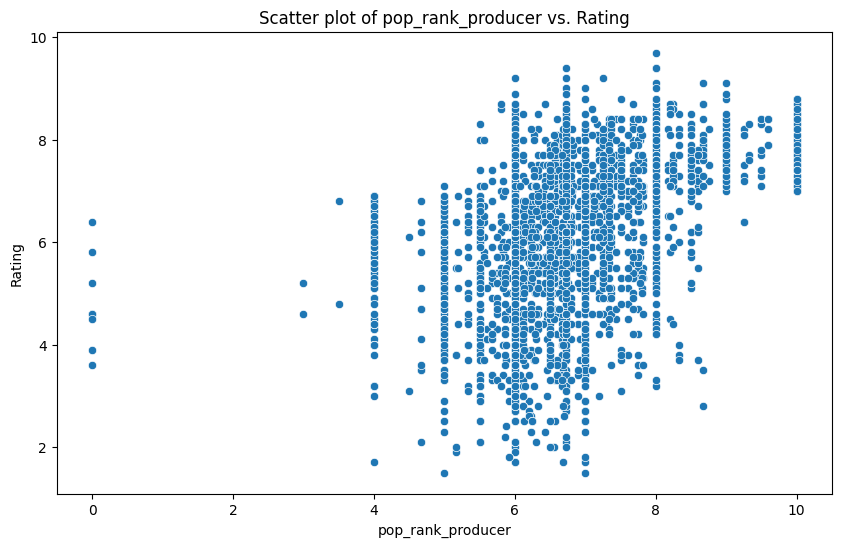

Correlation coefficient between pop_rank_producer and Rating: 0.48872296212827854
P-value: 0.48872296212827937



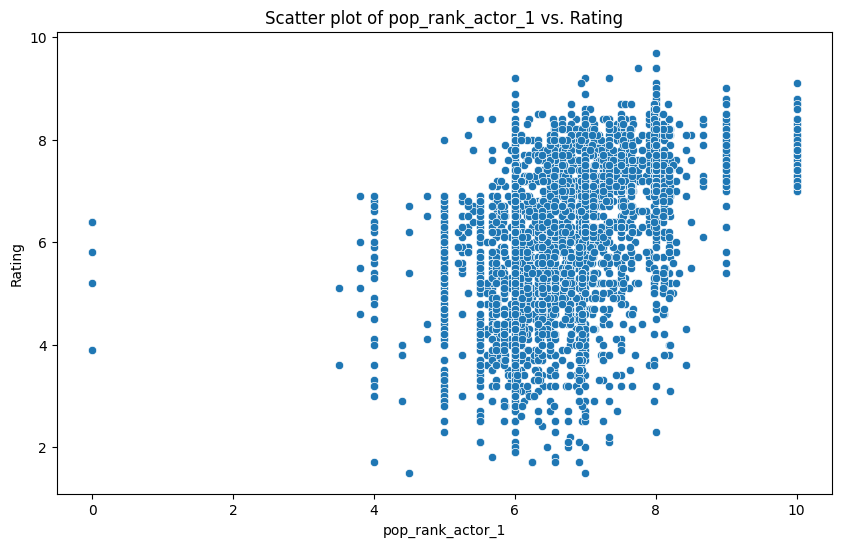

Correlation coefficient between pop_rank_actor_1 and Rating: 0.46500016998462274
P-value: 0.4650001699846225



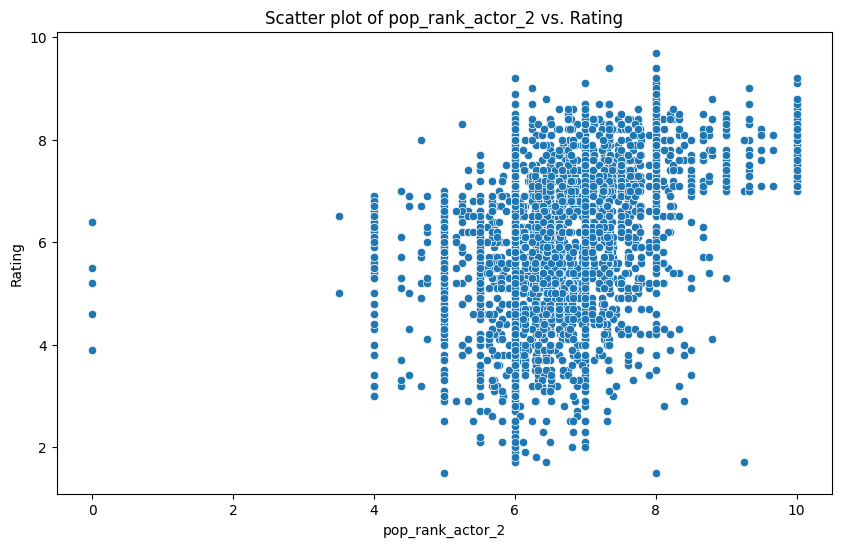

Correlation coefficient between pop_rank_actor_2 and Rating: 0.4617044648426645
P-value: 0.46170446484266664



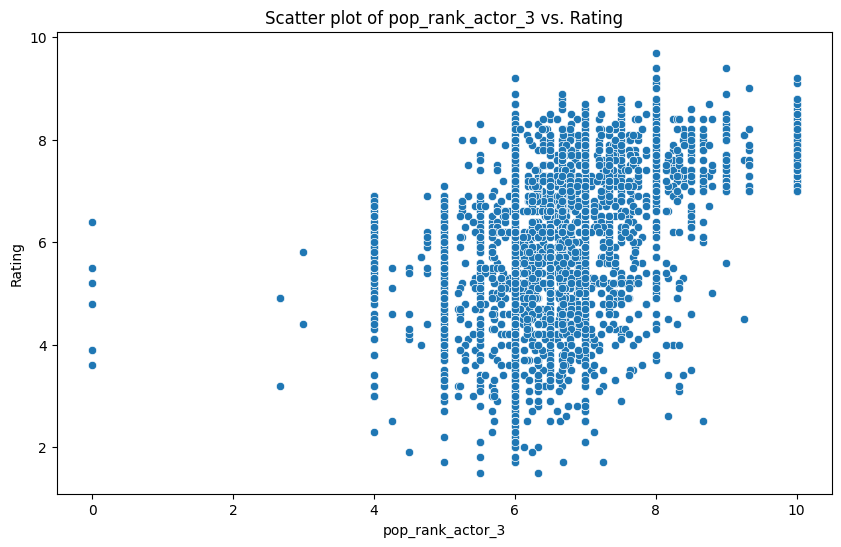

Correlation coefficient between pop_rank_actor_3 and Rating: 0.48741735717765383
P-value: 0.4874173571776539



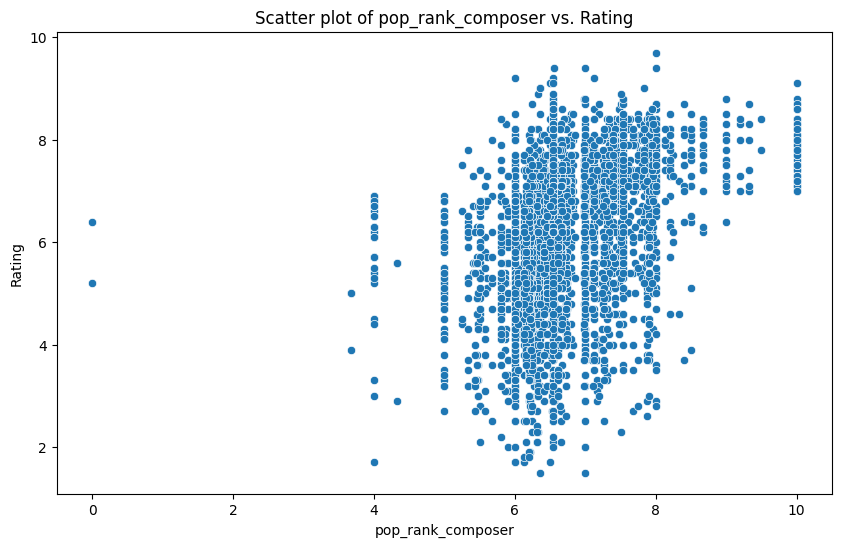

Correlation coefficient between pop_rank_composer and Rating: 0.40921731943888423
P-value: 0.40921731943888634



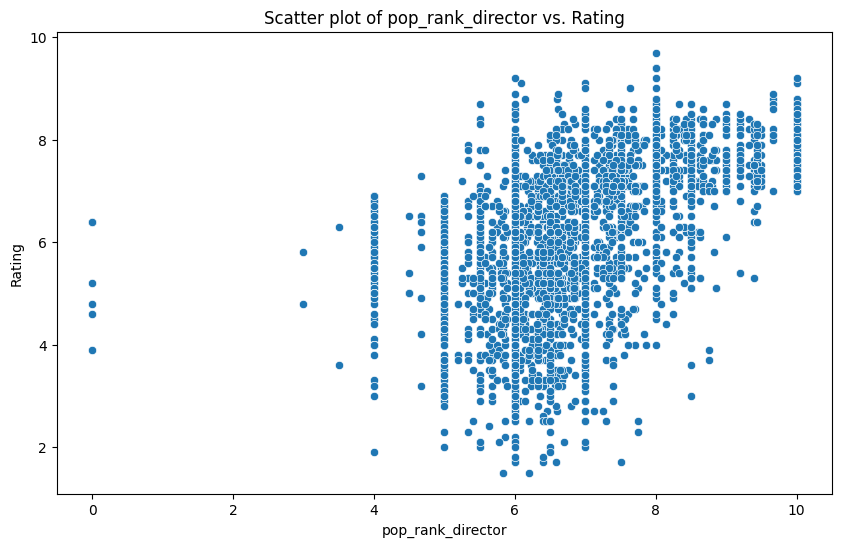

Correlation coefficient between pop_rank_director and Rating: 0.507970722646199
P-value: 0.5079707226461998



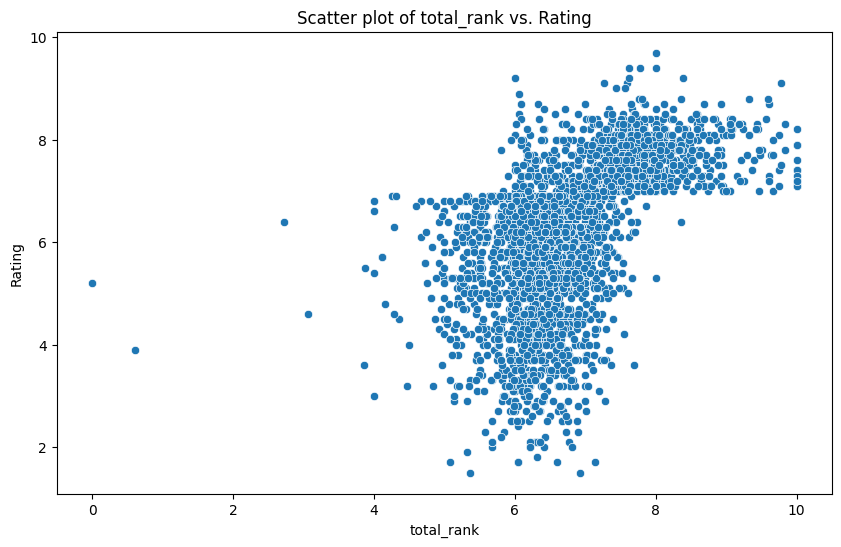

Correlation coefficient between total_rank and Rating: 0.5691651288662267
P-value: 0.5691651288662273



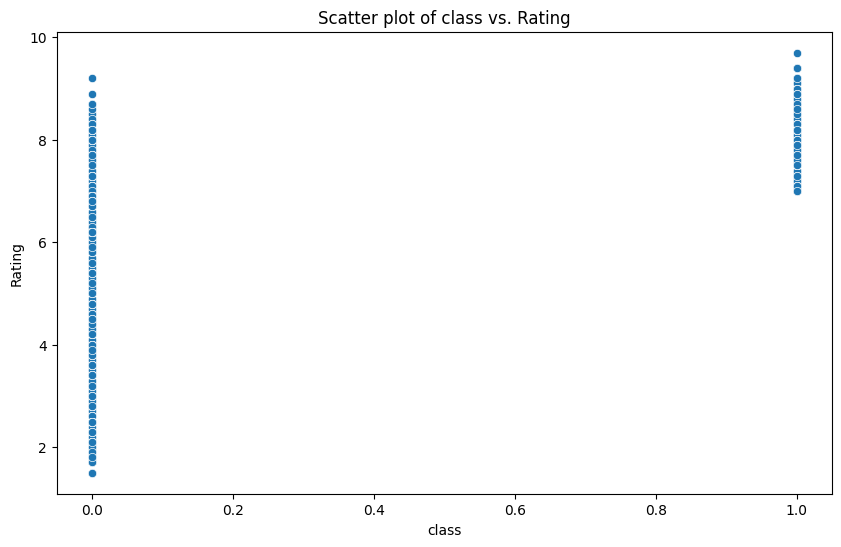

Correlation coefficient between class and Rating: 0.6964692781505687
P-value: 0.6964692781505681



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# High-correlation features
high_corr_features = ['pop_rank_producer', 'pop_rank_actor_1', 'pop_rank_actor_2',
                      'pop_rank_actor_3', 'pop_rank_composer', 'pop_rank_director',
                      'total_rank', 'class']

# Visualize relationships between high-correlation features and Rating
for feature in high_corr_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=moviesData_encoded, x=feature, y='Rating')
    plt.title(f'Scatter plot of {feature} vs. Rating')
    plt.show()

    # Create box plot for categorical feature 'class' (if applicable)
    if moviesData_encoded[feature].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature, y='Rating', data=moviesData_encoded)
        plt.title(f'Box plot of {feature} vs. Rating')
        plt.show()

    # Calculate correlation coefficient and p-value
    corr_coef = moviesData_encoded[feature].corr(moviesData_encoded['Rating'])
    p_value = moviesData_encoded[[feature, 'Rating']].corr(method='pearson').values[0, 1]

    print(f"Correlation coefficient between {feature} and Rating: {corr_coef}")
    print(f"P-value: {p_value}\n")


In [ ]:
# Create a subset of moviesData with the specified columns
moviesData_encoded = moviesData[['Rating', 'pop_rank_producer', 'pop_rank_actor_1', 'pop_rank_actor_2',
'pop_rank_actor_3', 'pop_rank_composer', 'pop_rank_director', 'total_rank', 'class']]

**Feature Engineering:**

**Interaction Features:**

Create new features by multiplying or dividing high-correlation features.
For example, you might multiply pop_rank_producer with pop_rank_director to capture an interaction between the producer and director's popularity.

**Transformations:**

Apply transformations such as logarithmic, square root, or power transformations to high-correlation features.
These transformations can help normalize skewed data and improve relationships.
Binning and Categorization:
Create bins or categories based on high-correlation features.
For example, you might bin the pop_rank_producer feature into low, medium, and high popularity categories.

In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming 'moviesData_encoded' is your DataFrame

# # Interaction Features
# moviesData_encoded['prod_dir_interaction'] = moviesData_encoded['pop_rank_producer'] * moviesData_encoded['pop_rank_director']
# moviesData_encoded['actor1_actor2_interaction'] = moviesData_encoded['pop_rank_actor_1'] * moviesData_encoded['pop_rank_actor_2']

# # Transformations
# moviesData_encoded['log_pop_rank_producer'] = np.log1p(moviesData_encoded['pop_rank_producer'])
# moviesData_encoded['sqrt_total_rank'] = np.sqrt(moviesData_encoded['total_rank'])

# # Binning and Categorization
# # Binning 'pop_rank_producer' into low, medium, high
# moviesData_encoded['pop_rank_producer_bin'] = pd.cut(moviesData_encoded['pop_rank_producer'], bins=3, labels=['low', 'medium', 'high'])

# # Binning 'total_rank' into low, medium, high
# moviesData_encoded['total_rank_bin'] = pd.cut(moviesData_encoded['total_rank'], bins=3, labels=['low', 'medium', 'high'])

# # Checking the dataset
# print("Feature engineering complete:")
# print("Interaction features, transformations, and binning added.")
# print(moviesData_encoded.head())


In [ ]:
#Counting the number of missing values in the dataset
moviesData_encoded.isnull().sum()

Rating                 0
pop_rank_producer      0
pop_rank_actor_1       0
pop_rank_actor_2       0
pop_rank_actor_3       0
pop_rank_composer      0
pop_rank_director      0
total_rank           948
class                  0
dtype: int64

In [ ]:
# List all column names in moviesData_encoded
print("Columns in moviesData_encoded:")
print(moviesData_encoded.columns)

Columns in moviesData_encoded:
Index(['Rating', 'pop_rank_producer', 'pop_rank_actor_1', 'pop_rank_actor_2',
       'pop_rank_actor_3', 'pop_rank_composer', 'pop_rank_director',
       'total_rank', 'class'],
      dtype='object')


In [ ]:
# Impute missing values in total_rank using the mean of the column
mean_total_rank = moviesData_encoded['total_rank'].mean()
# Use .loc to set values
moviesData_encoded.loc[:, 'total_rank'] = moviesData_encoded['total_rank'].fillna(mean_total_rank)
# Verify that the missing values have been handled
print("Missing values in 'total_rank' after imputation:", moviesData_encoded['total_rank'].isnull().sum())

Missing values in 'total_rank' after imputation: 0


In [ ]:
#Counting the number of missing values in the dataset
moviesData_encoded.isnull().sum()

Rating               0
pop_rank_producer    0
pop_rank_actor_1     0
pop_rank_actor_2     0
pop_rank_actor_3     0
pop_rank_composer    0
pop_rank_director    0
total_rank           0
class                0
dtype: int64

In [ ]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
# Define target variable
target_variable = 'Rating'
# Separate features and target
X = moviesData_encoded.drop(target_variable, axis=1)
y = moviesData_encoded[target_variable]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)

(3234, 8)


In [ ]:
print(y_train.shape)

(3234,)


In [ ]:
print(X_test.shape)

(809, 8)


In [ ]:
print(y_test.shape)

(809,)


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Convert y_train and y_test to categorical variables
# Define the number of bins and labels (e.g., ['low', 'medium', 'high'])
bins = 3
labels = ['low', 'medium', 'high']

# Convert y_train and y_test to categorical bins using pd.cut
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

# Define the list of categorical columns in X_train and X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to one-hot encode categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave other columns as they are
)

# Create a pipeline with the column transformer, scaler (optional), and Logistic Regression model
pipeline = Pipeline([
    ('preprocessing', column_transformer),
    ('scaler', StandardScaler()),  # Optional: Standardize features
    ('model', LogisticRegression(max_iter=1000))
])

# Train the Logistic Regression model using the pipeline
pipeline.fit(X_train, y_train_binned)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_binned, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7737948084054388


In [ ]:
# Train a Naive Bayes model

from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model using the training data
nb_classifier.fit(X_train, y_train_binned)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test_binned, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)



Naive Bayes Accuracy: 0.7737948084054388


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model using the training data
svm_classifier.fit(X_train, y_train_binned)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test_binned, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 0.7737948084054388


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the base models
models = [
    ('logistic_regression', LogisticRegression(max_iter=1000)),
    ('naive_bayes', MultinomialNB()),
    ('svm', SVC(kernel='linear'))
]

# Create the ensemble model
ensemble_model = VotingClassifier(models)

# Train the ensemble model
ensemble_model.fit(X_train, y_train_binned)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate the accuracy of the ensemble model
accuracy_ensemble = accuracy_score(y_test_binned, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)


Ensemble Accuracy: 0.7737948084054388


In [ ]:
# prompt: generate method that take input and give output of three models

def generate_model_predictions(input_data):
  """
  This function takes input data and returns the predictions of three models: Logistic Regression, Naive Bayes, and SVM.

  Args:
    input_data: A Pandas DataFrame containing the input features.

  Returns:
    A tuple containing the predictions of the three models.
  """

  # Preprocess the input data
  X = input_data.copy()
  categorical_cols = X.select_dtypes(include=['object']).columns
  column_transformer = ColumnTransformer(
      transformers=[
          ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
      ],
      remainder='passthrough'
  )
  X = column_transformer.fit_transform(X)
  X = StandardScaler().fit_transform(X)

  # Make predictions using the three models
  logistic_regression_prediction = pipeline.predict(X)
  naive_bayes_prediction = nb_classifier.predict(X)
  svm_prediction = svm_classifier.predict(X)

  # Return the predictions
  return logistic_regression_prediction, naive_bayes_prediction, svm_prediction


In [ ]:
import pickle

# Save the ensemble model to a file
with open('/content/drive/MyDrive/ensemble_model.pkl', 'wb') as file:
  pickle.dump(ensemble_model, file)


In [ ]:
%pip install flask


In [ ]:
from flask import Flask, request, render_template_string
import numpy as np
import pickle  # Assuming you have saved your model as a pickle file

# Initialize the Flask app
app = Flask(__name__)

# Load your model (you may need to update the path to your saved model file)
with open('/content/drive/MyDrive/ensemble_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the HTML form
html_form = """
<!DOCTYPE html>
<html>
<head>
    <title>Movie Success Prediction</title>
    <style>
        /* CSS Styling */
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
        }
        h1 {
            color: #333;
        }
        form {
            margin: 20px 0;
        }
        label {
            display: block;
            margin-bottom: 8px;
            font-weight: bold;
        }
        input[type="number"], input[type="submit"] {
            width: 100%;
            padding: 8px;
            margin-bottom: 10px;
            border: 1px solid #ccc;
            border-radius: 4px;
        }
        input[type="submit"] {
            background-color: #007BFF;
            color: white;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
        /* Add CSS styling for better user experience */
        #result {
            margin-top: 20px;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>Movie Success Prediction</h1>
    <form action="/predict" method="post">
        <label for="rating">Rating:</label>
        <input type="number" id="rating" name="rating" step="0.01" placeholder="Enter rating (e.g., 7.5)" required>

        <label for="pop_rank_producer">Producer Popularity Rank:</label>
        <input type="number" id="pop_rank_producer" name="pop_rank_producer" step="0.01" placeholder="Enter producer popularity rank" required>

        <label for="pop_rank_actor_1">Actor 1 Popularity Rank:</label>
        <input type="number" id="pop_rank_actor_1" name="pop_rank_actor_1" step="0.01" placeholder="Enter actor 1 popularity rank" required>

        <label for="pop_rank_actor_2">Actor 2 Popularity Rank:</label>
        <input type="number" id="pop_rank_actor_2" name="pop_rank_actor_2" step="0.01" placeholder="Enter actor 2 popularity rank" required>

        <label for="pop_rank_actor_3">Actor 3 Popularity Rank:</label>
        <input type="number" id="pop_rank_actor_3" name="pop_rank_actor_3" step="0.01" placeholder="Enter actor 3 popularity rank" required>

        <label for="pop_rank_composer">Composer Popularity Rank:</label>
        <input type="number" id="pop_rank_composer" name="pop_rank_composer" step="0.01" placeholder="Enter composer popularity rank" required>

        <label for="pop_rank_director">Director Popularity Rank:</label>
        <input type="number" id="pop_rank_director" name="pop_rank_director" step="0.01" placeholder="Enter director popularity rank" required>

        <label for="total_rank">Total Rank:</label>
        <input type="number" id="total_rank" name="total_rank" step="0.01" placeholder="Enter total rank" required>

        <input type="submit" value="Predict">
    </form>

    <!-- Display prediction results -->
    <div id="result">
        {% if prediction is defined %}
            {{ prediction }}
        {% endif %}
    </div>
</body>
</html>
"""

# Define the home route that serves the HTML form
@app.route('/')
def home():
    return render_template_string(html_form)

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Retrieve form inputs
        inputs = [
            float(request.form['rating']),
            float(request.form['pop_rank_producer']),
            float(request.form['pop_rank_actor_1']),
            float(request.form['pop_rank_actor_2']),
            float(request.form['pop_rank_actor_3']),
            float(request.form['pop_rank_composer']),
            float(request.form['pop_rank_director']),
            float(request.form['total_rank'])
        ]

        # Convert inputs to a numpy array
        inputs_array = np.array([inputs])

        # Run your model prediction code using the input features
        prediction = model.predict(inputs_array)[0]  # Assuming your model returns a list and you want the first prediction

        # Return the prediction result
        result_html = render_template_string(html_form, prediction=f"Prediction (class): {prediction}")
        return result_html

    except Exception as e:
        # Handle any exceptions and provide a meaningful error message
        return f"An error occurred during prediction: {str(e)}"

# Run the Flask app
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
